[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tamaragerber/climate_archives/blob/main/climate_proxies.ipynb)


# Climate proxies in Ice Cores

In [4]:
# Install ipympl so that we can use interactive plots
!pip install ipympl
# And activate in Colab
from google.colab import output
output.enable_custom_widget_manager()

**Important!** If this is the first time you are running the Notebook, restart your session now using the menu 'Runtime... Restart session'. You don't need to run the above cell again afterwards, you can continue with the rest of the Notebook.


In [1]:
# --- file donwnload ---
import requests
import os
files = {'NGRIP_CFA_1mm.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDEpdnAjHQ4QYfTgnlpu9-pAc7bghz1jJojEV6NrWRorXo?download=1',
         'NGRIP_chronology_20.tab': 'https://unils-my.sharepoint.com/:u:/g/personal/tamara_gerber_unil_ch/IQClh1_35mApRblnQSBAg7neAVnPyULUqkyVqbk8KkqdfgU?download=1',
         'domec_d18O.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQAfO8HLRMCOTa9o4bOPxDM3AQMlioPEBqxYviEAhR9Gpk4?download=1',
         'domec_co2.tab': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQCVnsLgGK6LQZoFgRlHaA76ARfRxhX81KLCTJOuwdnHQXs?download=1'}

for f in files:
    if os.path.exists(f):
        print('File already downloaded.')
    else:
        print('Downloading...')
        response = requests.get(files[f])
        open(f, 'wb').write(response.content)
print('Done.')

File already downloaded.
File already downloaded.
File already downloaded.
File already downloaded.
Done.


## Impurities
Impurities in ice cores originate from the atmosphere and are deposited with snowfall. They can be grouped into two broad types:

 **Aerosol-derived particles (solids)**  
  - Dust and minerals transported from continental deserts.  
  - Sea-salt particles (mainly Na⁺ and Cl⁻) from marine spray.  
  - Sulfate and nitrate salts from volcanic eruptions or anthropogenic sources.  
  - Soot or black carbon, and occasionally organic material.  

 **Soluble chemical species (liquids/acidic or basic ions)**  
   - Sulfate (SO₄²⁻), nitrate (NO₃⁻), chloride (Cl⁻),  
   - Ammonium (NH₄⁺), sodium (Na⁺), calcium (Ca²⁺), and others.  
   Once incorporated into the firn and ice, these ions remain trapped in the solid matrix or along grain boundaries and inclusions.

Impurities can be measured in discrete samples or continuously through the so-called **Continuous Flow Analysis (CFA)**. After ice cores are drilled they are cut into pieces which are dedicated to different types of analysis. A central piece from the interior of the ice core is usually used for the CFA to avoid contamination with materials that have touched the ice core surface. This ice stick is then melted contunuously on a warm plate and the meltwater stream is analysed in real time for multiple ions and acids (Na⁺, Ca²⁺, NH₄⁺, NO₃⁻, SO₄²⁻, etc.). This allows high-resolution (mm-scale) impurity profiles that reflect seasonal or sub-seasonal variations in atmospheric composition.

Another method that can be indicative of impurities is to measure the electrical conductivity. Because pure ice is an electrical insulator, most of the current actually travels along thin films of acidic liquid at the boundaries between ice crystals. The **Electrical Conductivity Measurement (ECM)** has the advantage of being non-destructive. Thereby a pair of electrodes is dragged along the ice core and the electrical conductivity is measured as a function of depth. The conductivity is increased when acidic impurities (such as H₂SO₄, HNO₃, HCl) are present because they lower the pH. Strong peaks in ECM are often related to sulfur acid deposited during volcanic eruptions. Dust and sea-salt particles often contain neutral or basic impurities (Ca²⁺, Na⁺, NH₄⁺) and have the potential to neutralize acids and decrease the conductivity of the ice.

Impurity records serve two key purposes in ice-core science:

1) **Establishing timescales & ice-core synchronization**: Because the atmospheric concentration of impurities varies with seasonality, they can be used to establish ice-core timescales through annual-layer counting in the upper parts of ice cores. Volcanic sulfate spikes provide absolute age markers when matched to known eruptions. Distinctive volcanic signals or abrupt impurity events (e.g., large dust peaks) appear across multiple cores and can be used to align timescales between sites.

2) **Reconstructing past environments and climate changes**: Many impurities are linked to distinct atmospheric and climatic conditions, and can therefore be used to reconstruct the past climate. For example:  
  - Dust and calcium (Ca²⁺) indicate atmospheric dustiness and source aridity.  
  - Sodium (Na⁺) and cloride (Cl⁻) trace sea-ice extent and marine influence.  
  - Ammonium (NH₄⁺) relates to continental biogenic emissions.  
  - Sulfate (SO$_4$²⁻) reflects volcanic emissions.
  - Nitrate (NO$_3$⁻) is caused by lightning and natural biomass burning.

---

### Exercise 1

The NorthGRIP ice core (North Greenland Ice Core Project) was completed in 2003 and subsequently analyzed by continuous flow analysis (CFA) at the University of Bern. The resulting high-resolution impurity record, published by *Erhardt et al. (2021)*, spans the period from 42,000 to 10,000 years before present (BP).

This interval covers part of the last glacial period (approximately 115–11.7 ka BP), which was marked by a series of abrupt climate fluctuations known as Dansgaard–Oeschger (D–O) events, that are related to changes in the northatlantic ocean circulation. The Bølling–Allerød warm phase (14.7–12.9 ka BP) was followed by the Younger Dryas cold period (12.9–11.6 ka BP), which ended abruptly at the onset of the current interglacial, the Holocene (11.6 ka BP to present).

**a)** Plot the NorthGRIP impurity record with the code below, and examine how the different parameters vary over time.

- How do their concentrations change during cold and warm periods (warm and cold periods are indicated with the oxygen isotope record at the bottom panel, whereby more negative values indicate colder temperatures)?


**b)** Zoom in on the depth interval 1405–1410 m, where individual seasonal cycles can be seen.

- Which parameters show synchronous behaviour? Can you explain which parameter peaks during which season?

- Estimate how many years are represented between 1405 m and 1410 m depth.



*Hint:* You can switch between a logarithmic and linear y-axis by uncommenting the line:

`# ax[i].set_yscale("log")`



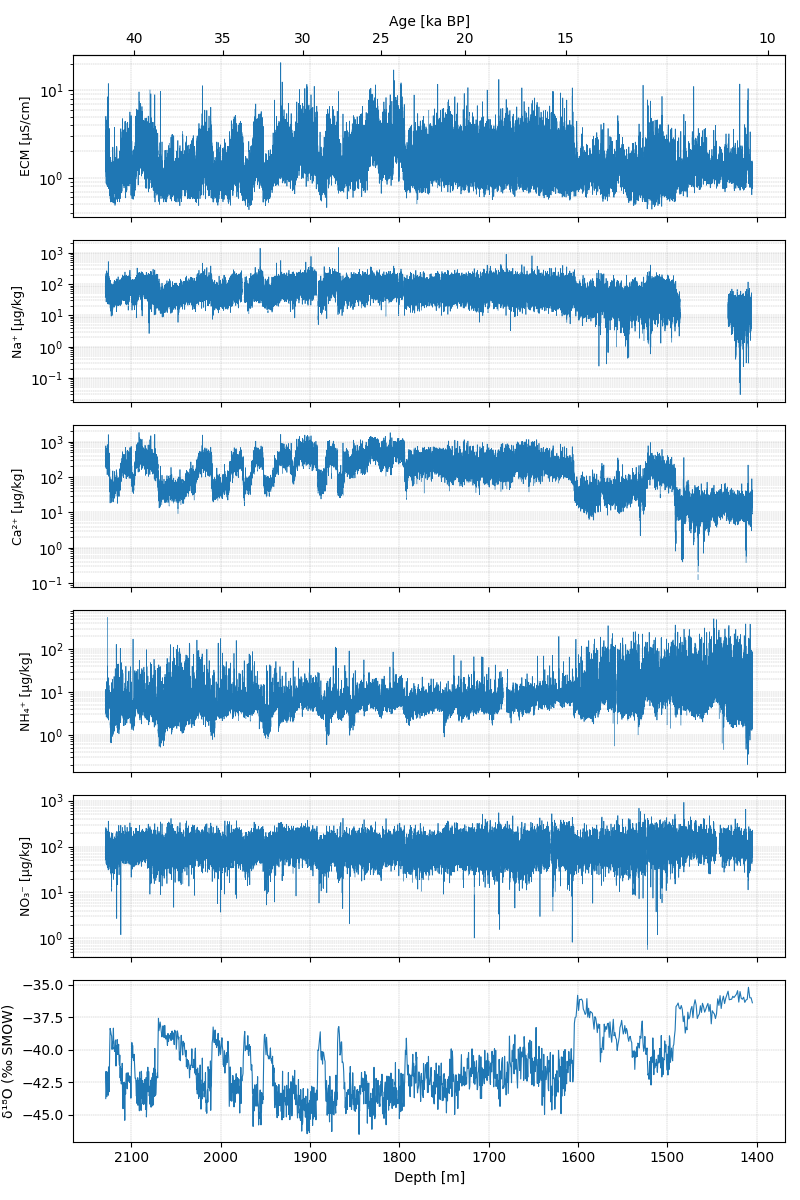

In [7]:
# --- imports ---
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

# --- filenames ---
ngrip_impurity_file = "NGRIP_CFA_1mm.csv"
ngrip_isotope_file = "NGRIP_chronology_20.tab"

# --- 1. read impurity data ---
with open(ngrip_impurity_file, 'r') as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Depth ice/snow"):
            header_line = i
            break

# --- Load data, skip metadata lines, convert numeric columns ---
ng_imp = pd.read_csv(ngrip_impurity_file, sep='\t', skiprows=header_line)
ng_imp = ng_imp.dropna(how='all').apply(pd.to_numeric, errors='coerce')

# --- 2. read isotope data ---
with open(ngrip_isotope_file, 'r') as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Age [ka BP]"):
            header_line = i
            break

ng_iso = pd.read_csv(ngrip_isotope_file, sep='\t', skiprows=header_line)
ng_iso = ng_iso.dropna(how='all').apply(pd.to_numeric, errors='coerce')

# --- 3. extract relevant columns ---
ngrip_depth_imp = ng_imp["Depth ice/snow [m]"]
ngrip_depth_iso = ng_iso["Depth ice/snow [m]"]
ngrip_age = ng_iso["Age [ka BP]"]
ngrip_delta18O = ng_iso["δ18O H2O [‰ SMOW]"]

# --- Define impurity variables to plot (column name, label) ---
variables = [
    ("EC [µS/cm]", "ECM [µS/cm]"),
    ("Na+ [µg/kg]", "Na⁺ [µg/kg]"),
    ("Ca2+ [µg/kg]", "Ca²⁺ [µg/kg]"),
    ("[NH4]+ [µg/kg]", "NH₄⁺ [µg/kg]"),
    ("[NO3]- [µg/kg]", "NO₃⁻ [µg/kg]"),
]

# --- 4. interpolation functions ---
depth_to_age = interp1d(ngrip_depth_iso, ngrip_age, fill_value="extrapolate")
age_to_depth = interp1d(ngrip_age, ngrip_depth_iso, fill_value="extrapolate")

# --- 5. define overlapping depth range ---
depth_min = max(ngrip_depth_imp.min(), ngrip_depth_iso.min())
depth_max = min(ngrip_depth_imp.max(), ngrip_depth_iso.max())

mask_imp = (ngrip_depth_imp >= depth_min) & (ngrip_depth_imp <= depth_max)
mask_iso = (ngrip_depth_iso >= depth_min) & (ngrip_depth_iso <= depth_max)

# --- 6. create figure ---
fig, ax = plt.subplots(6, 1, figsize=(8, 12), sharex=True)

# --- Plot impurity records ---
for i, (col, label) in enumerate(variables):
    if col in ng_imp.columns:
        ax[i].plot(ngrip_depth_imp[mask_imp], ng_imp[col][mask_imp], lw=0.5)
        # Uncomment below to use logarithmic y-axis
        #ax[i].set_yscale("log")
        ax[i].set_ylabel(label, fontsize=9)
        ax[i].grid(True, which="both", ls="--", lw=0.3)
        ax[i].set_yscale("log")   # logarithmique
    else:
        # If a variable is missing, display a notice instead of an empty plot
        ax[i].text(0.5, 0.5, f"{col} missing", ha="center", va="center")
        ax[i].set_axis_off()
        ax[i].set_yscale("log")   # logarithmique

# --- Plot δ18O record (bottom panel) ---
ax[-1].plot(ngrip_depth_iso[mask_iso], ngrip_delta18O[mask_iso], color='tab:blue', lw=0.8)
ax[-1].invert_xaxis()  # Depth increases downward
ax[-1].set_ylabel("δ¹⁸O (‰ SMOW)")
ax[-1].set_xlabel("Depth [m]")
ax[-1].grid(True, which="both", ls="--", lw=0.3)
ax[i].set_yscale("log")   # logarithmique

# --- Add secondary x-axis (age in ka BP) ---
secax = ax[0].secondary_xaxis('top', functions=(depth_to_age, age_to_depth))
secax.set_xlabel("Age [ka BP]")

plt.tight_layout()
plt.show()
ax[i].set_yscale("log")   # logarithmique

# Zoom in on depth interval 1405–1410 m
for axis in ax:
    axis.set_xlim(1410, 1405)   # Show only the range 1405–1410 m, with depth increasing downward



### Solution exercise 1

1a)
*(insert answer here)*

1b)
*(insert answer here)*

## δ$^{18}$O Isotopes

In the previous exercise, you explored how the concentration of impurities and the oxygen isotope ratio in ice vary with depth, reflecting changes in climatic conditions on both seasonal and longer timescales. The oxygen isotope ratio (δ$^{18}$O) is one of the most powerful proxies used to reconstruct past temperatures and understand large-scale climate variations.

Oxygen atoms occur in different stable isotopic forms, mainly $^{16}$O and $^{18}$O. The lighter isotope ($^{16}$O) is by far the most abundant, but a small fraction of oxygen atoms are the heavier $^{18}$O isotope. Because the mass of $^{18}$O is greater, molecules of H₂$^{18}$O behave slightly differently from H₂$^{16}$O during phase changes such as evaporation and condensation.

Most water vapour in the atmosphere originates from ocean evaporation. During this process, molecules containing the lighter $^{16}$O isotope evaporate more easily, leaving the ocean slightly enriched in $^{18}$O. As moist air cools and condenses into precipitation, the opposite happens: heavier $^{18}$O molecules condense and precipitate more readily, so the remaining vapour becomes increasingly depleted in $^{18}$O.

This process of fractionation depends strongly on temperature. The colder the air mass becomes as it moves poleward and upward, the more depleted its vapour (and therefore the precipitation) becomes in $^{18}$O. As a result, the ratio between $^{18}$O and $^{16}$O in deposited snow becomes more negative compared to the isotope ratio of the ocean. Since the ratio between $^{18}$O and $^{16}$O is very small, measurements are usually made in terms of the δ-values. This value compares the ratio $^{18}$O/$^{16}$O of ice to the ratio of 'standard mean ocean water':

$\delta^{18}O = \left[\frac{^{18}O/^{16}O_{ice}}{^{18}O/^{16}O_{SMOW}}-1\right]$.

---
### Exercise 2

**a)** Compare the isotope records between the NorthGRIP ice core, drilled in central Greenland, and the EPICA Dome C ice core, drilled on the antarctic plateau in East Antarctica. Why do you think the delta values from Dome C are generally more negative than from NorthGRIP? Can you spot any other differences in the record?

**b)** Until last year, the EPICA Dome C ice core held the record as the longest continuous ice-core archive, extending back to 800,000 years BP. (This has now been surpassed by the Beyond EPICA core, drilled about 30 km from Dome C, which has reached ice that is at least 1.2 million years old). How many glacial–interglacial cycles (i.e., alternating warm and cold periods) can you identify within the past 800,000 years of the Dome C record?



In [ ]:
# --- 2a) Plot NGRIP and EPICA Dome C δ18O records ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Load Dome C δ18O data ---
dc_iso = pd.read_csv("domec_d18O.csv")

# --- Define age range from NGRIP record ---
age_min, age_max = np.nanmin(ngrip_age), np.nanmax(ngrip_age)

# --- Subset Dome C data to match NGRIP age range ---
mask = (dc_iso["age"] >= age_min) & (dc_iso["age"] <= age_max)
iso_sub = dc_iso.loc[mask]

# --- Plot NGRIP and Dome C ---
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, constrained_layout=True)

# --- Panel 1: NGRIP ---
axes[0].plot(ngrip_age, ngrip_delta18O, color='tab:blue', lw=0.8)
axes[0].set_ylabel("δ¹⁸O (‰, NGRIP)")
axes[0].grid(True, ls="--", lw=0.3)
axes[0].set_title("NGRIP and EPICA Dome C δ¹⁸O Records")

#  Panel 2: Dome C ---
axes[1].plot(iso_sub["age"], iso_sub["d18O"], color='tab:orange', lw=0.8)
axes[1].set_xlabel("Age [ka BP]")
axes[1].set_ylabel("δ¹⁸O (‰, Dome C)")
axes[1].grid(True, ls="--", lw=0.3)
axes[1].invert_xaxis()

plt.show()

# --- 2b) Plot Dome C only ---
plt.figure(figsize=(8, 5))
plt.plot(dc_iso["age"], dc_iso["d18O"], color='steelblue', lw=1)
plt.gca().invert_xaxis()
plt.xlabel("Age [ka BP]")
plt.ylabel("δ¹⁸O (‰)")
plt.title("EPICA Dome C δ¹⁸O vs Age (EDC2 Age Model)")
plt.grid(True, ls="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Solution Exercise 2

2a)
*(insert your answer here)*


2b)
*(insert your answer here)*



## Greenhouse Gas Records

At cold polar sites, the air bubbles trapped in glacial ice contain ancient air samples whose concentrations of greenhouse gases (CO₂, CH₄, N₂O) closely reflect the atmospheric composition at the time of bubble closure. Because these gases are well mixed globally, their concentrations represent global atmospheric conditions, in contrast to isotopic or impurity records (e.g. δ¹⁸O, dust), which mainly record local climate.

In the upper part of the firn (the porous snowpack above the impermeable ice), air can still circulate freely with the atmosphere. Gas becomes permanently sealed only when the firn reaches a density of about 830 kg m⁻³, known as the pore close-off density.  
Since the ice enclosing the air was formed earlier (from snowfall that has already compacted into ice), the trapped gas is younger than the surrounding ice.

The age difference between the gas and the ice is called:

$\Delta_{age} = \text{Age}_{\text{gas}} - \text{Age}_{\text{ice}}$



---

### Exercise 3

**a)** Plot the $\delta ^{18}O$ record (from the previous exercise) and the CO₂ concentration record (`domec_co2.csv`) from the EPICA Dome C ice core side by side. You can extend the CO₂ curve with the most recent atmospheric CO₂ concentration (e.g., from [https://www.co2.earth/daily-co2](https://www.co2.earth/daily-co2)).

Estimate how much the two records appear shifted in time — i.e., by how many years does the CO₂ rise lag the temperature ($\delta ^{18}O$) increase during the past 100000 years?


**b) (optional)** The file `domec_co2.csv` gives the age of the ice surrounding each air sample. Using the equation above, calculate the $\Delta_{age}$ for Dome C.
You can approximate the firn density with a simple analytical function:

$\rho(z) = \rho_i - (\rho_i - \rho_0)\, e^{-kz}$,

where the surface density $\rho_0$ is 300 kg m⁻³ and the ice density $\rho_i$ is 917 kg m⁻³. Choose the parameter $k$ such that $ \rho(z_c) = \rho_c $:

$k = -\frac{1}{z_c}\,\ln\!\left(\frac{\rho_i - \rho_c}{\rho_i - \rho_0}\right)$.

Then evaluate:

$\Delta_{age} = \frac{1}{\rho_i\,\tilde{b}} \int_{0}^{z_c}\rho(z)\,dz$,

whereby assuming that under present-day conditions the mean accumulation rate over $\Delta_{age}$, $\tilde{b}$, is 0.028 m ice yr⁻¹, bubble close-off density, $\rho_c$, is 830 kg m⁻¹, and the bubble close-off depth, $z_c$, is 100 m.  *Hint*: The integral $\int_{0}^{z_c}\rho(z)\,dz$ can be expressed in python as: `integral = np.trapz(rho, z)`

Report the resulting $\Delta_{age}$ in years. How does this impact the time lag you estimated in **a)**? Can you assume that $\Delta_{age}$ was constant over the entire 800'000 years?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Read isotope data ---
dc_co2 = pd.read_csv("domec_co2.tab", sep=",", engine="python", skipinitialspace=True)

present_day_co2 = 426

# --- 2. Ensure column names are consistent ---
dc_co2.columns = ["depth","model_age", "co2"]

# --- 3. Create figure with two aligned panels ---
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, constrained_layout=True)

axes[0].plot(np.concatenate(([0], dc_co2["model_age"])), np.concatenate(([present_day_co2], dc_co2["co2"])))
axes[0].set_ylabel("C0_2")
axes[0].grid(True, ls="--", lw=0.3)
axes[0].set_title("C0_2")

axes[1].plot(dc_iso["age"]*1000, dc_iso["d18O"])
axes[1].set_xlabel("Age [ka BP]")
axes[1].set_ylabel("δ$^{18}$O ")
axes[1].grid(True, ls="--", lw=0.3)
axes[1].invert_xaxis()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters for Dome C ----
rho_i = ...       # kg/m3, density of ice
rho0 = ...        # kg/m3, surface density
rho_c = ...       # kg/m3, close-off density
z_c = ...         # m, close-off depth
b = ...            # kg m^-2 yr^-1, accumulation rate (~0.028 m ice/yr)

# ---- Firn density profile ----
k = ...
z = np.linspace(0, z_c, 200)
rho = ...

# ---- Integrate density over depth ----


# ---- Compute Delta age ----


### Solution exercise 3)

3a)
*(insert answer here)*


3b)
*(insert answer here)*



References:


Erhardt, T., Bigler, M., Federer, U., Gfeller, G., Leuenberger, D., Stowasser, O., Röthlisberger, R., Schüpbach, S., Ruth, U., Twarloh, B., Wegner, A., Goto-Azuma, K., Kuramoto, T., Kjær, H. A., Vallelonga, P. T., Siggaard-Andersen, M.-L., Hansson, M. E., Benton, A. K., Fleet, L. G., Mulvaney, R., Thomas, E. R., Abram, N., Stocker, T. F., and Fischer, H.: High-resolution aerosol concentration data from the Greenland NorthGRIP and NEEM deep ice cores, Earth Syst. Sci. Data, 14, 1215–1231, https://doi.org/10.5194/essd-14-1215-2022, 2022.


Andersen, Katrine K; Bigler, Matthias; Buchardt, Susanne L; Clausen, Henrik Brink; Dahl-Jensen, Dorthe; Davies, Siwan M; Fischer, Hubertus; Goto-Azuma, Kumiko; Hansson, Margareta E; Heinemeier, Jan; Johnsen, Sigfús Jóhann; Larsen, L B; Muscheler, Raimund; Olsen, G J; Rasmussen, Sune Olander; Röthlisberger, Regine; Ruth, Urs; Seierstad, Inger K; Siggaard-Andersen, Marie-Louise; Steffensen, Jørgen Peder; Svensson, Anders M; Vinther, Bo Møllesøe (2007): Greenland Ice Core Chronology 2005 (GICC05) and 20 year means of oxygen isotope data from ice core NGRIP [dataset]. PANGAEA, https://doi.org/10.1594/PANGAEA.586838

Gkinis, Vasileios; Dahl-Jensen, Dorthe; Steffensen, Jørgen Peder; Vinther, Bo Møllesøe; Landais, Amaëlle; Jouzel, Jean; Masson-Delmotte, Valerie; Cattani, Olivier; Minster, Bénédicte; Grisart, Antoine; Hörhold, Maria; Stenni, Barbara; Selmo, Enricomaria (2021): Oxygen-18 isotope ratios from the EPICA Dome C ice core at 11 cm resolution [dataset]. PANGAEA, https://doi.org/10.1594/PANGAEA.939445

Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949